In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [19]:
#1

In [20]:
df = pd.read_csv("conversion.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [21]:
print(df.shape)
df.info()

(1143, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [22]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [23]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [24]:
#2

/Users/nikolaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Impressions', ylabel='Density'>

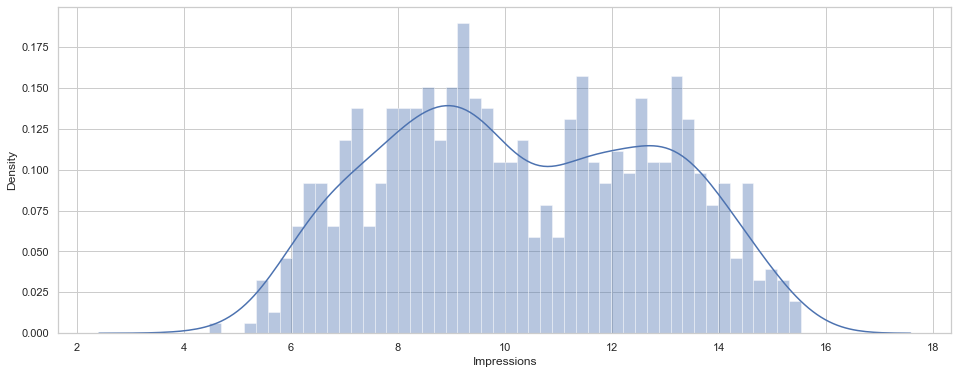

In [40]:
sns.distplot(np.log(df.groupby(df['fb_campaign_id']).Impressions.sum()), hist=True, kde=True, bins=50)

# Bimodal distribution

In [41]:
#3

In [42]:
#CTR = Cliks/Impressions

df['ctr'] = df.Clicks / df.Impressions

In [43]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [49]:
df.loc[df['ctr'].idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
ctr                    0.001059
Name: 150, dtype: object

In [50]:
#4

<AxesSubplot:xlabel='ctr'>

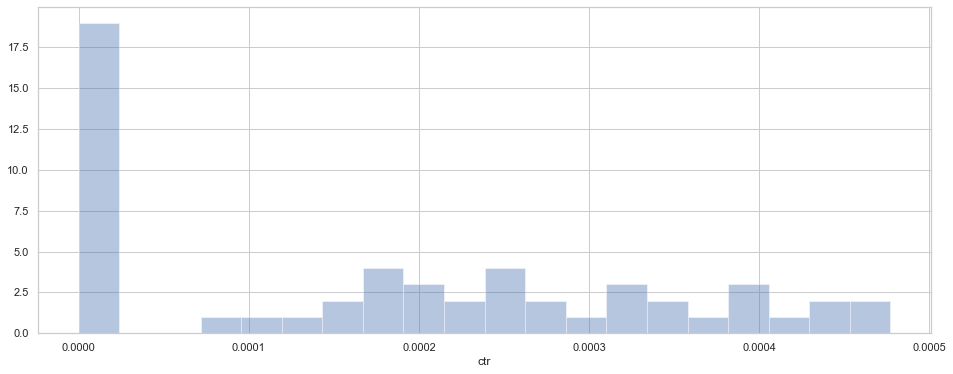

In [54]:
sns.distplot(df[df['xyz_campaign_id'] == 916].ctr, bins=20, kde=False)

In [55]:
#5

In [56]:
#CPC = spent/cliks

df['cpc'] = df.Spent / df.Clicks

In [57]:
df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

/Users/nikolaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc', ylabel='Density'>

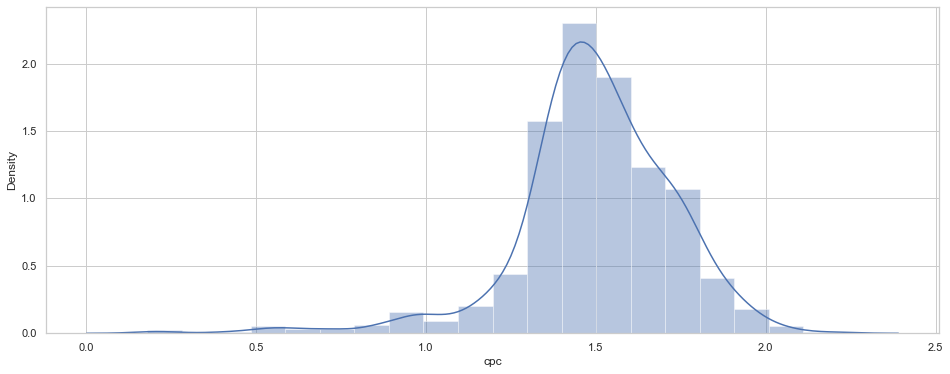

In [61]:
sns.distplot(df['cpc'].dropna(), hist=True, kde=True, bins=20)

In [64]:
IQR = df['cpc'].quantile(0.75) - df['cpc'].quantile(0.25)

print("IQR:", round(IQR, 2))

IQR: 0.25


In [65]:
#6

/Users/nikolaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nikolaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc', ylabel='Density'>

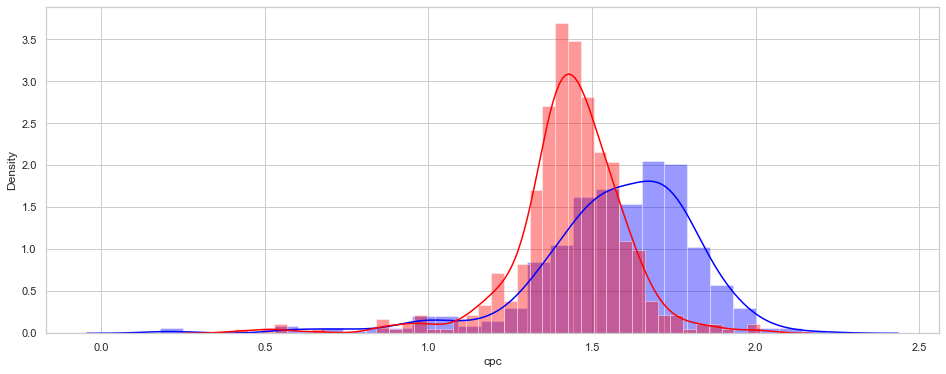

In [80]:
df_cpc_M = df.query("gender == 'M'").cpc.dropna()
df_cpc_W = df.query("gender == 'F'").cpc.dropna()

sns.distplot(df_cpc_M, color='blue', label='Male') 
sns.distplot(df_cpc_W, color='red', label='Female')

In [81]:
#7

In [82]:
df['сr'] = (df.Approved_Conversion / df.Clicks) * 100

In [83]:
df[df['ad_id'] == 1121814].сr

860    3.087886
Name: сr, dtype: float64